In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("scores_data.csv")

In [5]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [7]:
#since all scores out of 7, we can adjust the scores of each rows as follows 

In [8]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [9]:
df.columns=df.columns.str.strip()

In [10]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [11]:
df["Score"]=df["Score"].str.replace(" / 7","")

In [12]:
df["Score"]

0      6
1      6
2      7
3      7
4      4
      ..
144    4
145    4
146    4
147    3
148    2
Name: Score, Length: 149, dtype: object

In [13]:
df["Score"]=pd.to_numeric(df["Score"])

In [14]:
df["Score"]

0      6
1      6
2      7
3      7
4      4
      ..
144    4
145    4
146    4
147    3
148    2
Name: Score, Length: 149, dtype: int64

In [15]:
df.isnull().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [16]:
df["Score"].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64

In [17]:
df.groupby("Batch")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


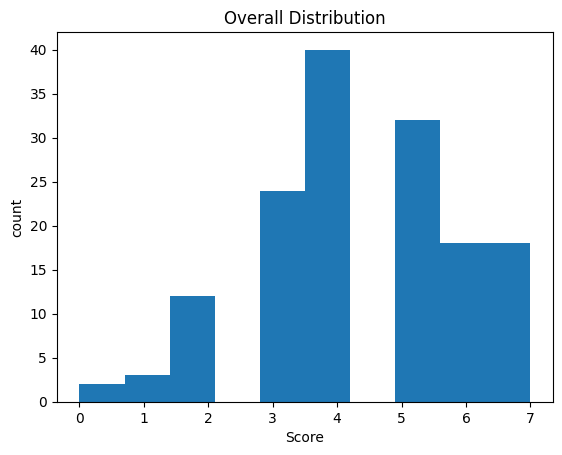

In [18]:
plt.hist(df["Score"])
plt.xlabel("Score")
plt.ylabel("count")
plt.title("Overall Distribution")
plt.show()


In [22]:
df[(df["Score"]>2) & (df["Score"]<3)]

,Batch,User_ID,Score


In [20]:
min_outlier=df["Score"].min()
max_outlier=df["Score"].max()
print(min_outlier)
print(max_outlier)

0
7


In [21]:
df[df["Score"]==min_outlier]

,Batch,User_ID,Score
68,AI_ELITE_6,uid_81,0
135,AI_ELITE_4,uid_14,0


In [23]:
df[df["Score"]==max_outlier]

,Batch,User_ID,Score
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
5,AI_ELITE_7,uid_144,7
7,AI_ELITE_7,uid_142,7
15,AI_ELITE_7,uid_134,7
16,AI_ELITE_7,uid_133,7
17,AI_ELITE_7,uid_132,7
19,AI_ELITE_7,uid_130,7
24,AI_ELITE_7,uid_125,7
35,AI_ELITE_7,uid_114,7


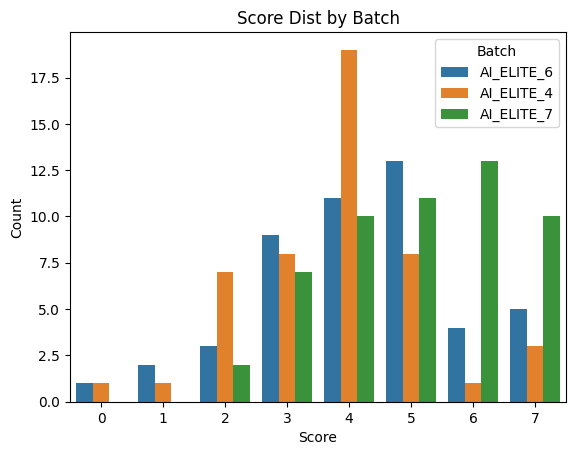

In [30]:
plt.figure()
sn.countplot(data=df,x="Score",hue="Batch")
plt.title("Score Dist by Batch")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

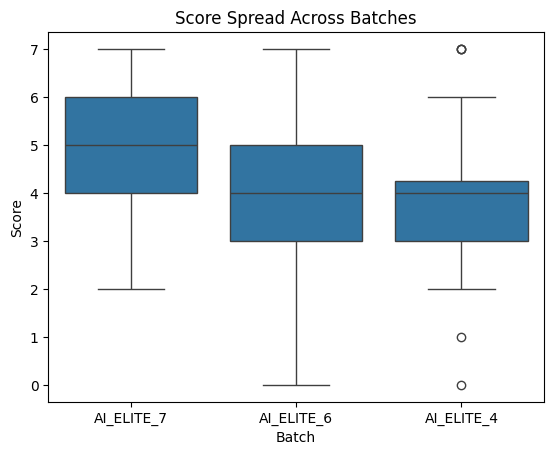

In [32]:
plt.figure()
sn.boxplot(data=df,x="Batch",y="Score")
plt.title("Score Spread Across Batches")
plt.xlabel("Batch")
plt.ylabel("Score")
plt.show()
